# MTH793P - Coursework 4 - Part II

This is a template notebook for the computational exercises of Coursework 4, part 2/3, of the module MTH793P, Advanced Machine Learning. 

In this exercise we will explore the three clustering methods we've seen in class (K-means, GMM, Spectral).<br>
We will use the [MNIST digit dataset](http://yann.lecun.com/exdb/mnist/) to see how these different clustering methods perform on real data.<br> You should use the following classes:
- [**sklearn.cluster.KMeans**](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) (do **not** use your implementation from part I),
- [**sklearn.mixture.GaussianMixture**](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)
- [**sklearn.cluster.SpectralClustering**](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html)
<br>

Read the documentation / examples, to learn how to use them. <br>
You can try to test the various paramaters, but for your final submission always use the **default** values, unless you're instructed otherwise (and except for the number of clusters, which should match our clustering task).

In [1]:
###
### Required imports
###

import numpy as np
import matplotlib.pyplot as plt

from load_mnist import load_mnist
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import rand_score
from sklearn.manifold import SpectralEmbedding

from numpy.testing import assert_array_equal
from numpy.testing import assert_equal
from numpy.testing import assert_almost_equal
from numpy.testing import assert_array_almost_equal

%matplotlib inline

In [2]:
###
### Load the MNIST dataset
###

mnist_im, mnist_lb = load_mnist('DigitMNIST/')

The MNIST dataset is a collection of grayscale images of handwritten digits (0,1,...,9).<br>
Here, we will only want to look at the images representing the digits **4,6,8**.<br>
Extract from the loaded dataset only the images corresponding to these digits.<br>
Place this subsets of the images and labels in **<font color='red'>mnist_im_sub</font>** and **<font color='red'>mnist_lb_sub</font>**, respectively.<br>
Note that the images size is 28x28, but they are stored as vectors of length 784.

In [3]:
###
### Extract only a subset of the digits.
###

DIGITS = [4,6,8]

### BEGIN SOLUTION

K = len(DIGITS)
NIM = mnist_lb.shape[0]
mnist_im_sub = np.array([mnist_im[i] for i in range(NIM) if mnist_lb[i] in DIGITS])
mnist_lb_sub = np.array([mnist_lb[i] for i in range(NIM) if mnist_lb[i] in DIGITS])

### END SOLUTION

Drawing a sample of the images. Make sure that you only see the digits **4,6,8** here.

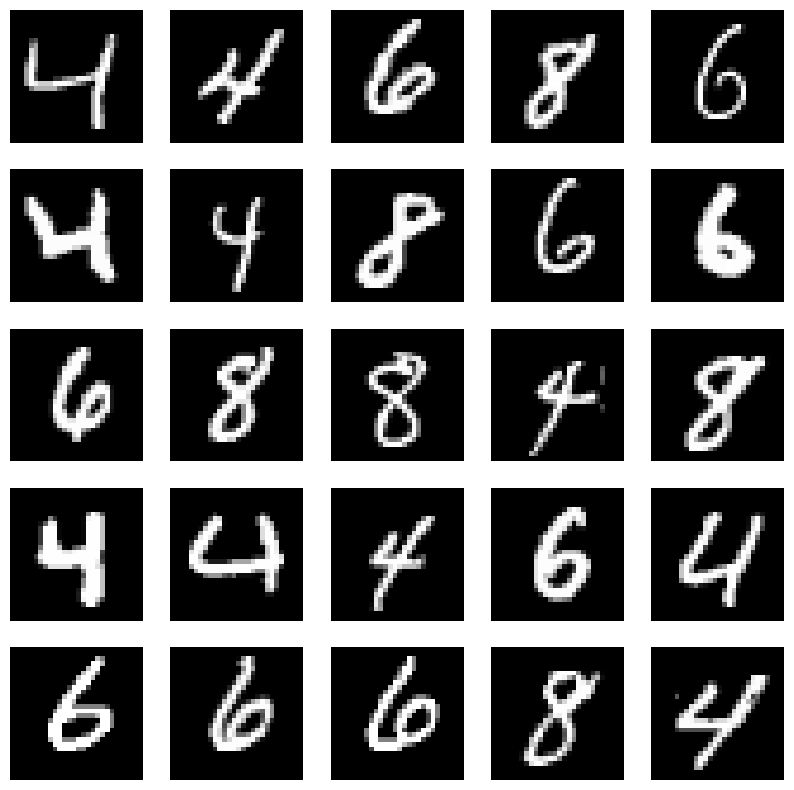

In [4]:
###
### Plot a sample of the images from the database.
###

M = 5
plt.figure(figsize=(10,10))
for i in range(M):
    for j in range(M):
        t = j+i*M
        plt.subplot(M,M,t+1)
        plt.imshow(np.reshape(mnist_im_sub[t, :], (28, 28)), cmap='gray')
        plt.axis('off')

In order for the clustering to run faster, chop the variable **mnist_im_sub** to contain only the first 1000 images (so it's a 1000x784 dimensional array). <br> Do the same for **mnist_im_lb**.
Store the results back in the same variables (**<font color='red'>mnist_im_sub</font>**, **<font color='red'>mnist_lb_sub</font>**).

In [5]:
### BEGIN SOLUTION
NIM = 1000
mnist_im_sub = mnist_im_sub[:NIM,:]
mnist_lb_sub = mnist_lb_sub[:NIM]
### END SOLUTION

###
### Making sure arrays are of the right size.
###
assert_array_equal(mnist_im_sub.shape, (1000,784))
assert_array_equal(mnist_lb_sub.shape, 1000)

Use **KMeans** (imported from sklearn.cluster) to run the K-means clustering algorithm on the images.<br>
Store the resulting labels in **<font color='red'>km_labels</font>** and the cluster centers in **<font color='red'>km_centers</font>**.

In [6]:
### BEGIN SOLUTION

print("Running K-means...")
KMC = KMeans(n_clusters=K, n_init=10)
KMC.fit(mnist_im_sub)

km_labels = KMC.labels_
km_centers = KMC.cluster_centers_
print("DONE")

### END SOLUTION

Running K-means...
DONE


Next, use **GaussianMixture** (imported from sklearn.mixture) to run the GMM clustering algorithm.<br>
Store the resulting labels in **<font color='red'>gm_labels</font>** and the cluster centers in **<font color='red'>gm_centers</font>**.

In [7]:
### BEGIN SOLUTION

print("Running GMM...")
GMC = GaussianMixture(n_components=K)
GMC.fit(mnist_im_sub)
print("DONE")

gm_labels = GMC.predict(mnist_im_sub)
gm_centers = GMC.means_

### END SOLUTION

Running GMM...
DONE


Finally, use **SpectralClustering** (imported from sklearn.cluster) to run the spectral clustering algorithm.<br>
For this algorithm, make sure to set **<font color='blue'>affinity='nearest_neighbors</red>'** when you create the clustering object.<br>
Store the resulting labels in **<font color='red'>sp_labels</font>** (spectral clustering doesn't provide centers, why?)

In [8]:
### BEGIN SOLUTION

print("Running Spectral Clustering...")
SPC = SpectralClustering(n_clusters=K, affinity='nearest_neighbors')
SPC.fit(mnist_im_sub);
print("DONE")

sp_labels = SPC.labels_

### END SOLUTION

Running Spectral Clustering...
DONE


As a sanity check, we will examine the results on the first 10 images in the dataset.<br>
The code below draws these images.<br>
Print out the first 10 labels that you recieved for each of the three algorithms.<br>

[1 1 0 2 0 1 1 2 0 0]
[2 2 0 1 0 2 2 1 0 0]
[1 1 0 2 0 1 1 2 0 0]


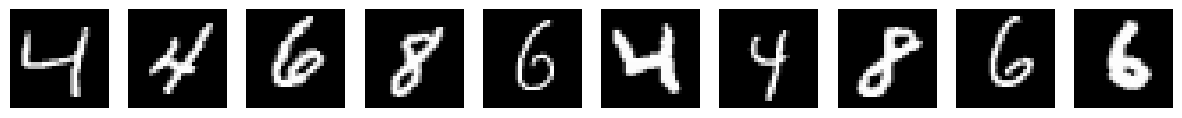

In [9]:
M = 10
plt.figure(figsize=(15,5))
for i in range(M):
    plt.subplot(1,M,i+1)
    plt.imshow(np.reshape(mnist_im_sub[i, :], (28, 28)), cmap='gray')
    plt.axis('off')
    
### BEGIN SOLUTION ###
print(km_labels[:10])
print(gm_labels[:10])
print(sp_labels[:10])
### END SOLUTION ###

For each of the algorithms, did you get **perfect** cluster labels? (for the first 10 digits)<br>
**Question:** If you didn't look at the images, could you tell which class is 4 / 6 / 8?

As a second check, we display the centers of the clusters (relevant for **K-means** and **GMM** only).<br>
The code below will show the images, but you have to fill in the variables **<font color='red'>im_show_km</font>** and **<font color='red'>im_show_gm</font>** with the corresponding center at each step of the loop. Remember that you have to switch from vector to matrices before drawing an image.

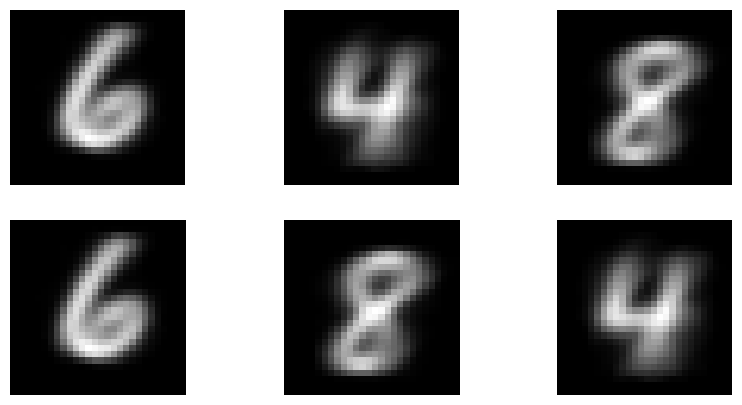

In [10]:
plt.figure(figsize=(10, 5))

for counter in range(K):
    ##########
    ### BEGIN SOLUTION
    im_show_km = np.reshape(KMC.cluster_centers_[counter, :], (28, 28))
    im_show_gm = np.reshape(GMC.means_[counter, :], (28, 28))
    ### END SOLUTION
    ##########
    plt.subplot(2, K, counter+1)
    plt.imshow(im_show_km,cmap='gray')
    plt.axis('off')
    plt.subplot(2, K, counter+K+1)
    plt.imshow(im_show_gm,cmap='gray')
    plt.axis('off')
plt.tight_layout;  

For spectral clustering, we want to examine the embedding that the algorithm produces.<br>
For that we can use [**sklearn.manifold.SpectralEmbedding**](http://).<br>
Read the documentation / examples, and apply the embedding $P:\mathbb{R}^{784}\to \mathbb{R}^2$
to transform the array of high dimensional vectors in **mnist_im_sub** ($1000\times 784$) into a new array **<font color='red'>mnist_im_emb</font>** that is of dimension $1000\times 2$.<br>
Make sure to set the number of components correctly.

In [11]:
### BEGIN SOLUTION ###
SE = SpectralEmbedding(n_components=K-1)
mnist_im_emb = SE.fit_transform(mnist_im_sub)
### END SOLUTION ###

We now plot the resulting 2D embedding. What can you deduce from the output?

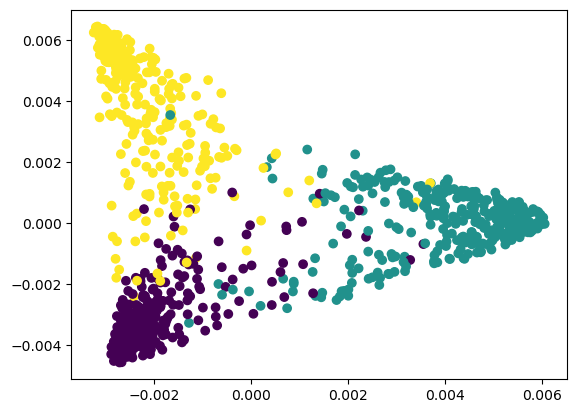

In [12]:
###
### Plot 2D embedding of the images.
###

plt.scatter(mnist_im_emb[:,0], mnist_im_emb[:,1], c=mnist_lb_sub);

Finally, we would like to get a qunatitave estimate for the clustering quality of each of the methods.<br>
Since in this example we know what the ground truth is (the labels given by the MNIST database), we can use an exteral evaluation.<br>
Use **rand_score** (imported from sklearn.metrics) to compute the Rand Score for each of the three algorithms.<br>
Store the results in **<font color='red'>km_RI</font>**, **<font color='red'>gm_RI</font>**, and **<font color='red'>sp_RI</font>** (for K-means, GMM, and Spectral clustering, respectively).

In [13]:
### BEGIN SOLUTION ###
km_RI = rand_score(mnist_lb_sub, km_labels)
gm_RI = rand_score(mnist_lb_sub, gm_labels)
sp_RI = rand_score(mnist_lb_sub, sp_labels)
### END SOLUTION ###

print("Rand Index for K-Means clustering: %.10f" % km_RI)
print("Rand Index for Gassian Mixture clustering: %.10f" % gm_RI)
print("Rand Index for Spectral clustering: %.10f" % sp_RI)

Rand Index for K-Means clustering: 0.8779839840
Rand Index for Gassian Mixture clustering: 0.8792432432
Rand Index for Spectral clustering: 0.9549449449
